# Price Prediction for Second Hand Cars in Germany

## Contents

1-EDA (Exploratory Data Analysis)

  1-2-Feature Engineering

2-Modeling 

  2-0-Splitting the Data Set
  
  2-1-Linear Regression
  
  2-2-Decision Tree
  
  2-3-Bagging
  
  3-4-AdaBoost
  
  2-5-K-Nearest Neighbours
  
  2-6-Random Forest
  
3-Conclusion

  3-1-Summary

  3-2-Model Comparison
  
  3-3-Recommendations and Future Work

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1-EDA (Exploratory Data Analysis)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [2]:
selected_df = pd.read_csv('final_car_data.csv')

In [3]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [4]:
selected_df.describe

<bound method NDFrame.describe of         year  price  power_kw  mileage_in_km  brand
0       2011   9900     103.0       119000.0      2
1       2011   9290     118.0       184574.0      2
2       2011   9499      77.0       114860.0      2
3       2011  11990     103.0       205013.0      2
4       2011  10900     150.0       192350.0      2
...      ...    ...       ...            ...    ...
120791  2023  28788      81.0            5.0      0
120792  2023  28420      81.0         4900.0      0
120793  2023  59990     110.0        10500.0      0
120794  2023  30370     152.0           10.0      0
120795  2023  69990     110.0          501.0      0

[120796 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [5]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.0180e+03 2.0000e+02 4.9485e+04 2.0000e+00]
 [2.0130e+03 1.2500e+02 2.0100e+05 1.0000e+00]
 [2.0180e+03 4.1000e+02 2.3000e+04 1.0000e+00]
 ...
 [2.0140e+03 8.1000e+01 2.6200e+04 0.0000e+00]
 [2.0110e+03 2.6000e+02 9.4000e+04 2.0000e+00]
 [2.0230e+03 1.1000e+02 1.0000e+01 2.0000e+00]]
[[2.0180e+03 1.1000e+02 7.7374e+04 0.0000e+00]
 [2.0160e+03 1.3500e+02 7.0000e+04 4.0000e+00]
 [2.0190e+03 7.4000e+01 2.5601e+04 5.0000e+00]
 ...
 [2.0190e+03 2.1000e+02 1.0840e+05 2.0000e+00]
 [2.0190e+03 1.1000e+02 3.1317e+04 6.0000e+00]
 [2.0150e+03 1.5000e+02 1.3500e+05 0.0000e+00]]
[ 34950  14985 126941 ...  14999  29900  46778]
[18888 19500 19290 ... 60000 28950  8499]


### 2-1-Linear Regression

In [6]:
%run regression.ipynb
out = linear_reg(X_train, X_test, y_train, y_test)
#print('output= ', out)
y_pred = out[0]
print("y_pred ", y_pred)
print("mae, mse, medae, r2: ", out[1], out[2], out[3], out[4])

y_pred  [26470.73423249 23712.23918066 18429.83379991 ... 44318.4471451
 24147.55055158 25914.10872634]
mae, mse, medae, r2:  6691.80460094551 180910073.38468322 4208.817569688894 0.5991024698039342


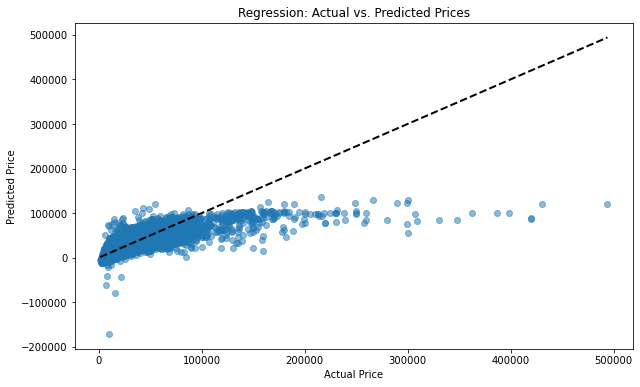

In [7]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression: Actual vs. Predicted Prices')
plt.show()

In [8]:
# Linear Regression After Scaling
out = linear_reg_scaled(X_train, X_test, y_train, y_test)
#print('output= ', out)
y_pred = out[0]
print("y_pred ", y_pred)
print("mae, mse, medae, r2: ", out[1], out[2], out[3], out[4])

y_pred  [26470.73423249 23712.23918065 18429.83379991 ... 44318.4471451
 24147.55055158 25914.10872634]
mae, mse, medae, r2:  6691.804600945829 180910073.38468215 4208.817569688799 0.5991024698039364


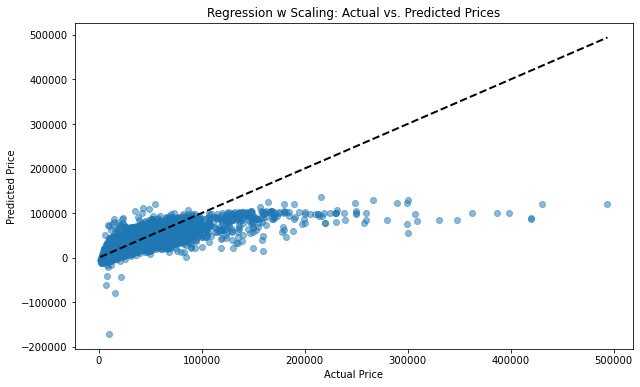

In [9]:
# Plotting scaled version of y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression w Scaling: Actual vs. Predicted Prices')
plt.show()

#### Conclusion

The dataset was highly scrapped and also is very diverse and the features given do not competely describe the listings. Therefore, the result seems satisfactory, although not highly applicable.

 ###  2-2-Decision Tree

In [10]:
%run Decision_Tree.ipynb

#Measuring Execution Time
start_time = time.time()

#dc_tree = decision_tree(X_train, y_train, X_test,y_test)
dc_tree = decision_tree(X_train, X_test, y_train, y_test)

end_time = time.time()
execution_time = end_time - start_time

y_pred = dc_tree[0]
print("y_pred ", y_pred)
print("Accuracy: ", dc_tree[1])
print('Exection Time: ', execution_time)
print("mae, mse, medae, r2: ", dc_tree[2], dc_tree[3], dc_tree[4], dc_tree[5])

y_pred  [21945 24980 19490 ... 43800 26930 39000]
Accuracy:  0.036299668874172186
Exection Time:  38.17603135108948
mae, mse, medae, r2:  5569.9269867549665 203863376.65157285 2710.0 0.5482378473018439


#### Conclusion.
1-Decision tree took 35-60 sec (in several runs), while regression takes very short time. 

2-The accuracy is quite low; ~36% without parameters, ~11% with entropy and max_depth=3 (increasing max_depth slightly increases the accuracy). This is expected because of the diversity of the data as well as noise in the data.

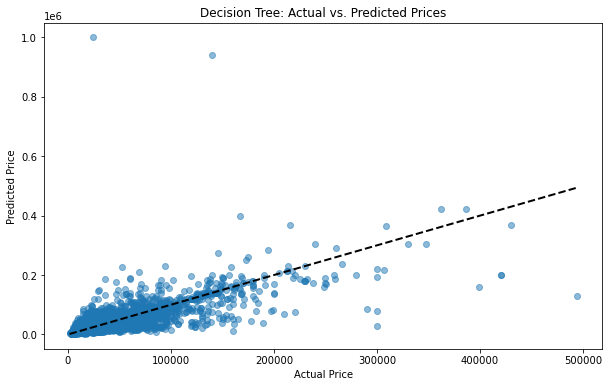

In [11]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs. Predicted Prices')
plt.show()

#### Note. 
Plotting Decision tree causes kernel fail and restart; This should be because of the large size of the decision tree.

## 2-3-Bagging

In [12]:
%run Bagging.ipynb
start_time = time.time()

estimator_range = [2,4,6, 8] #estimator range selection
#estimator_range = [2] #estimator range selection
out = bagging(X_train,X_test,y_train,y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('accuracy score list: ',out[0])
print('predicted values: ',out[1])
print('Execution Time: ',execution_time)
print("mae, mse, medae, r2: ", out[2], out[3], out[4], out[5])

accuracy score list:  [0.030049668874172184, 0.03464403973509934, 0.035554635761589404, 0.03704470198675497]
predicted values:  [21945 24980 19490 ... 43800 26930 16999]
Execution Time:  527.0987362861633
mae, mse, medae, r2:  5481.333650662252 137154879.28356788 2701.0 0.6960641752535088


#### Note. accuracy increases as the estimator increases. The errors look satisfactory.
For larger estimators we run out of memory below.

In [13]:
"""
start_time = time.time()

estimator_range = [10,12] #estimator range selection
out = bagging(X_train,X_test,y_train,y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('accuracy score list: ',out[0])
print('Execution Time: ',execution_time)
"""

"\nstart_time = time.time()\n\nestimator_range = [10,12] #estimator range selection\nout = bagging(X_train,X_test,y_train,y_test,estimator_range)\n\nend_time = time.time()\nexecution_time = end_time - start_time\n\nprint('accuracy score list: ',out[0])\nprint('Execution Time: ',execution_time)\n"

In [14]:
# Also trying bagging with out-of-bag option
#setting estimator=12 based on the above computations
# HOWEVER, KERNEL DIES WHEN WE RUN THIS
"""
start_time = time.time()

n_estimators = 12  
out_oob = baggin_w_oob(X_train,X_test,y_train,y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('accuracy score list: ',out[0])
print('Execution Time: ',execution_time)
"""

"\nstart_time = time.time()\n\nn_estimators = 12  \nout_oob = baggin_w_oob(X_train,X_test,y_train,y_test,estimator_range)\n\nend_time = time.time()\nexecution_time = end_time - start_time\n\nprint('accuracy score list: ',out[0])\nprint('Execution Time: ',execution_time)\n"

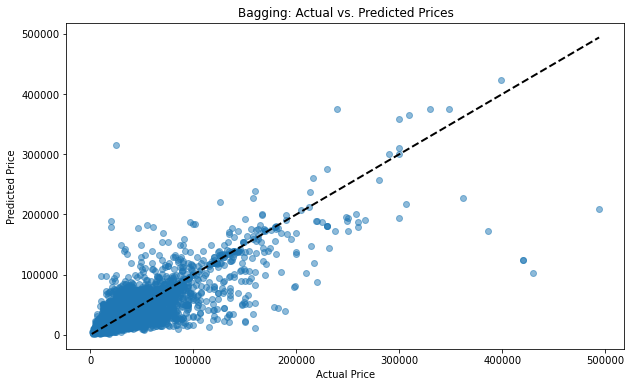

In [15]:
# Plotting y_test and y_pred to understand the spread.
y_pred = out[1]

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Bagging: Actual vs. Predicted Prices')
plt.show()

Note. Visually, Bagging plot seems better than the previous ones.

### 2-4-AdaBoost  w Cross Validation

In [16]:
%run adaboost.ipynb
start_time = time.time()

estimator_range = [2,4,6,8] #estimator range selection
out = adaboost(X_train, X_test, y_train, y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('validation scores: ',out[1])
print('mae scores: ',out[2])
print('mse scores: ',out[3])
print('medae scores: ',out[4])
print('r2 scores: ',out[5])
print('Execution Time: ',execution_time)

validation scores:  [-208242505.71350327, -304674112.08171546, -380522166.94363844, -348044999.69935876]
mae scores:  [8220.010474362345, 8099.530817082277, 8480.465320512609, 9603.875373593542]
mse scores:  [192508738.71842697, 177418350.38509727, 178511391.2977366, 203148641.36824295]
medae scores:  [5734.8884871460305, 5842.962493002426, 6339.860231902225, 7393.81476052779]
r2 scores:  [0.5733997756483622, 0.6068401435579338, 0.6044179600162325, 0.5498217038802538]
Execution Time:  7.183093309402466


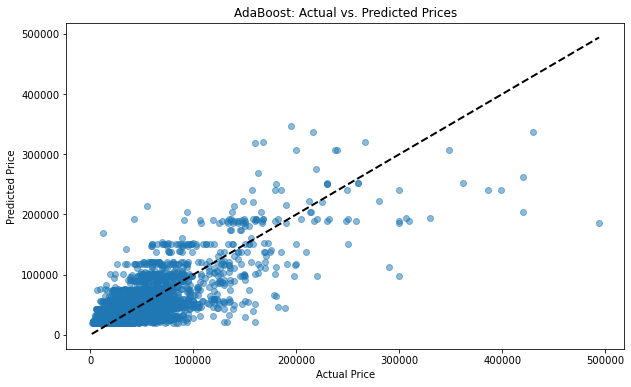

In [17]:
# Plotting y_test and y_pred to understand the spread.
y_pred = out[0]
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('AdaBoost: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. Quite satisfactory results.

### 2-5-KNN w Cross Validation

In [18]:
%run KNN.ipynb

out = knn_out = knn_model(X_train, X_test, y_train, y_test)

print('cross validation scores: ',out[1])
print('mae scores: ',out[2])
print('mse scores: ',out[3])
print('medae scores: ',out[4])
print('r2 scores: ',out[5])

cross validation scores:  [-2.25356513e+08 -1.07256439e+08 -1.14738866e+08 -1.28829784e+08
 -8.82138250e+07]
mae scores:  5000.26065397351
mse scores:  99156851.01312086
medae scores:  2690.7000000000007
r2 scores:  0.7802679755225559


<Figure size 1008x504 with 0 Axes>

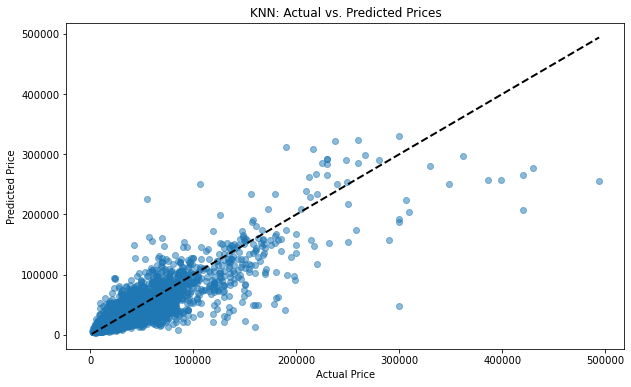

In [19]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_out[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.show()

#### Note. KNN results look quite satisfactory. In particular, it is much better than the other classifiers/regressors tried before this. Other than that, 5-fold cross validation used with KNN seems to be a good idea as the data is quite scrapped.

###  2-6-Random Forest w Cross Validation

In [20]:
%run Random_Forest.ipynb

start_time = time.time()

out_rand_forest = random_forest(X_train, X_test, y_train, y_test)

end_time = time.time()
execution_time = end_time - start_time

print('cross validation scores: ',out_rand_forest[1])
print('mae scores: ',out_rand_forest[2])
print('mse scores: ',out_rand_forest[3])
print('medae scores: ',out_rand_forest[4])
print('r2 scores: ',out_rand_forest[5])
print('Execution Time: ',execution_time)

cross validation scores:  [-2.29376662e+08 -9.55203709e+07 -1.43494989e+08 -1.44495579e+08
 -9.00261685e+07]
mae scores:  4398.045397265025
mse scores:  79699340.86540371
medae scores:  2315.2103571428574
r2 scores:  0.8233859048674739
Execution Time:  165.72220063209534


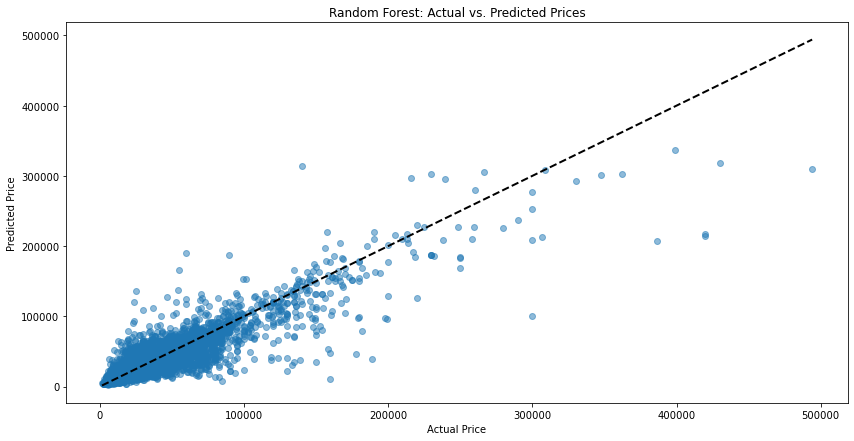

In [21]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(y_test, out_rand_forest[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.show()

#### Note. Random Forest seems to have the best error scores, even better than KNN.

## 3-Conclusion 

### 3-1-Summary

In this project six different models are used to predict the price of second hand cars based on the following selected features: year, power per kw, mileage in km and brand. In order to do this, the following models are used: Linear Regression, Decision Tree, Bagging, AdaBoost, K-Nearest Neighbours and Random Forest.  A variety of models is chosen, ranging from linear regression as a classical linear method to nonlinear methods such as decision tree and KNN and ensemble methods such as bagging.

The chosen database consisted in more than 250,000 samples of used cars in Germany. The project starts with  with cleaning database and performing Explanatory Data Analysis. The data had a lot of noise and discrepancy and after EDA, the reamining data is about half of the original data. 

Various erros are measured after performing our models. Common errors computed for all of our models  are  mean absolute error, mean squared error, median absolute error, R-squared error. Also accuracy error  is computed for certain relevant models. 

For visualisation, scattered plots comparing tested and predicted prices are done for all models.


### 3-2-Model Comparison
-Linear Regression :shows overrfitting. 

-Decision Tree: quite low accuracy rate, took 45sec, shows overfitting

-Bagging: took very long time; accuracy rate increases as estimator increases, ran out of memory for higher estimators, plot shows satisfactory predictions fine for under 15000 Euro price

-AdaBoost: CHECK AGAIN. took longer than decisionvtree but less than bagging,

-KNN with cross validation: One of the best models. Very satisfactory r2 squared error value, much faster than bagging

-Random Forest wih cross validation: Even better than KNN, very good r2 squared error value


### 3-3-Recommendations and Future Work


-Feature Engineering via additional features and feature interaction.

-Data Augmentation via using web scrapping techniques through online used car platforms like immoscout.

-Model Optimization; Hyperparameter Tuning by grid search or random search with cross-validation.

-Using other ensemble methods such as Gradient Boosting, XGBoost, or LightGBM.

-Advanced Machine Learning Techniques such as Neural Networks